In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/bike_rental.csv",parse_dates=['dteday'],dayfirst=True)

In [3]:
df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

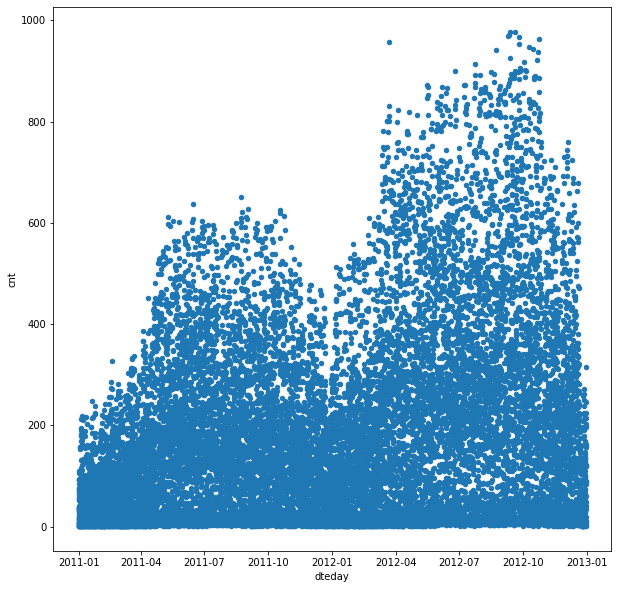

In [4]:
df.plot(x = 'dteday',y='cnt',kind = 'scatter',figsize = (10,10))

<AxesSubplot:>

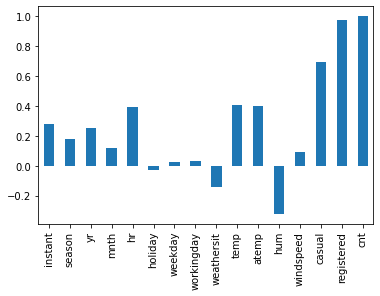

In [5]:
df.corrwith(df['cnt']).plot(kind='bar')

In [6]:
x = df[['hr','temp','atemp','hum','instant','season','yr','holiday','weekday','workingday','weathersit','windspeed']]
y = df['cnt']

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state= 42)

In [9]:
reg = DecisionTreeRegressor(max_depth=50)
reg.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=50)

In [10]:
ypred = reg.predict(xtest)

In [11]:
print("Score",reg.score(xtest,ytest)*100)
print("Mae",mean_absolute_error(ytest,ypred))
print("Mse",mean_squared_error(ytest,ypred))
print("All data score",reg.score(x,y)*100)

Score 89.28660818681684
Mae 33.84177215189873
Mse 3392.439585730725
All data score 97.93758094559705


In [12]:
df['pred']=reg.predict(x)

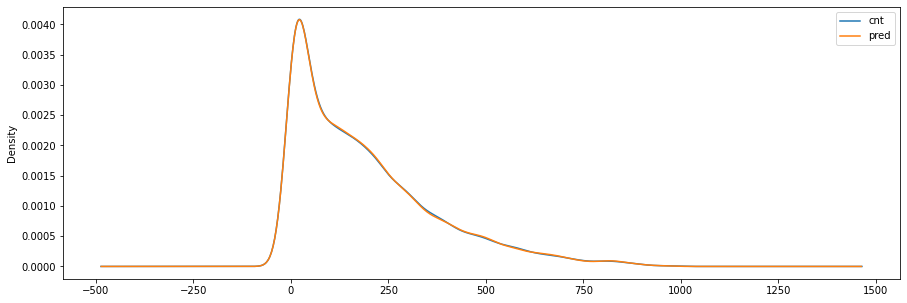

In [13]:
df['cnt'].plot(kind='kde',figsize = (15,5))
df['pred'].plot(kind ='kde',figsize = (15,5))
plt.legend()
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.tree import plot_tree

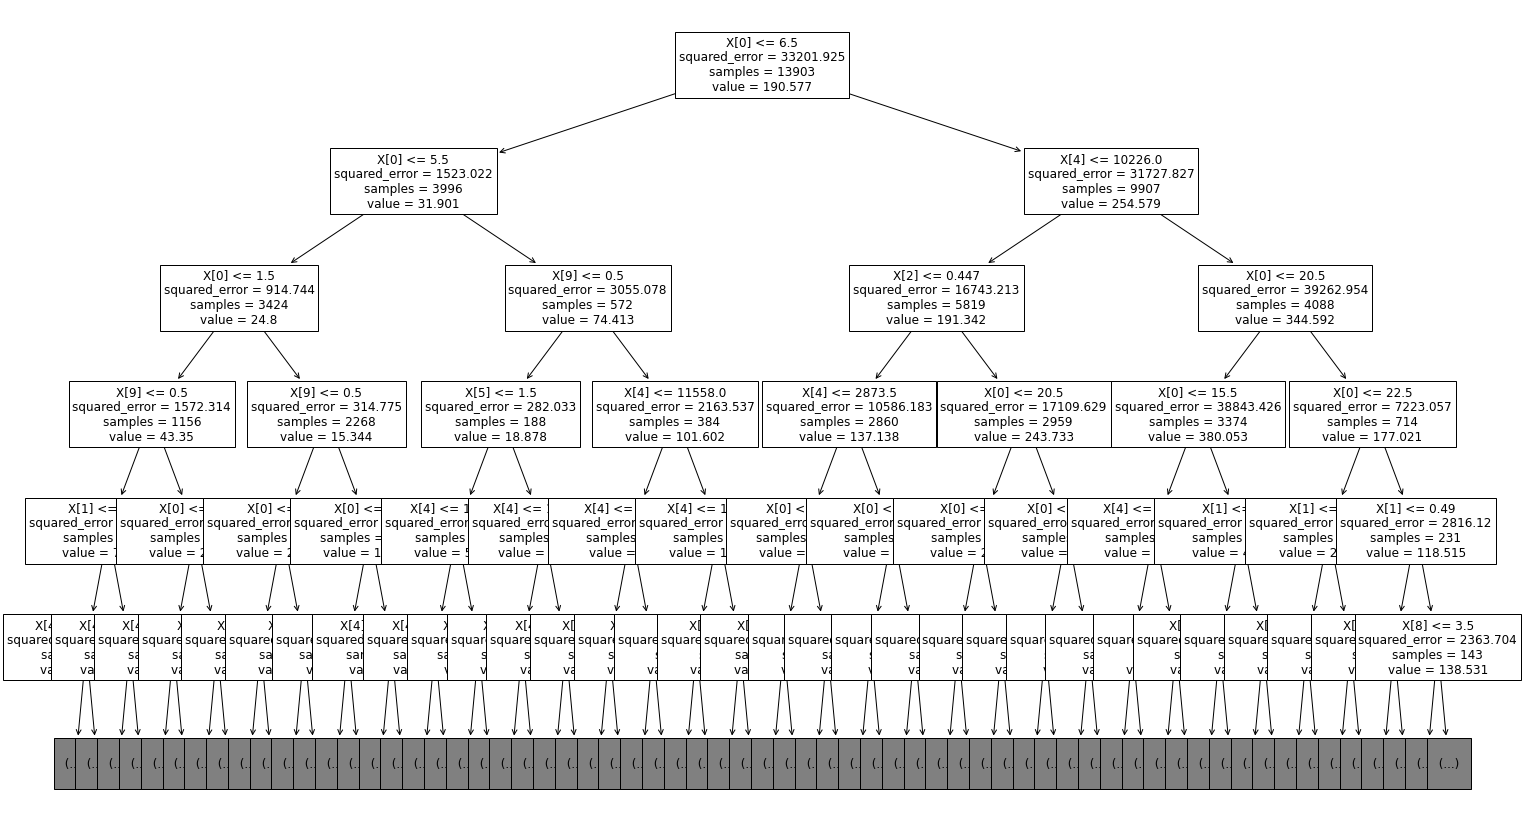

In [16]:
plt.figure(figsize=(25,15))
plot_tree(reg,max_depth=5,fontsize=12)
plt.show()